# Introduction to Data Science | CSX4501 | Final Project
- Student name: Leonardo Paiva
- Date: 09/01/2022

## Introduction: 

**Research questions:**

    I would like to know if theire is a correlation between how many calories a person can burn vs their weight, while being expoused to the same intensity, excercity type, conditions, and time.


**Why it is important to me, why it matters to others, and what is at stake:**

    It is important to me because I have been excercising for a year along with other friends, following the same diet strategy, and following a spefic traning program. We also have been using smart tracker to record metrics of our body and performance. After we start to share our results, I noticed that during the same workout the range of burned calory is very different. I think it matters to others, because if this teory confirms, each person can have personalized workouts to achive their goals.


**Data Source:**

    In order to conduct my research, I needed a dataset that contains data of activities and exercise performed by people with different weight at the same intensity and time. The source that I will be using is from (Kaggle) with usability score of 9.41.

    The Author is Aadhav Vighnesh and it was pulbished 2 year ago.

    The title of the dataset is *Calories Burned During Exercise and Activities*

- [Official source](https://www.kaggle.com/datasets/aadhavvignesh/calories-burned-during-exercise-and-activities?select=exercise_dataset.csv)

- [Download dataset directly from my github](https://github.com/leozitopaiva/csx4501-finalproject/blob/main/exercise_dataset.csv)


**Description:**

    This dataset contains the number of calories burned by a person while performing some activity/exercise. It currently contains 248 activities and exercises ranging from running, cycling, calisthenics, etc.

**About this file:**

    This dataset includes 4 differente personas across different weights as well as the "Activity, Exercise or Sport (1 hour)"that the personas have been expousured

* 130 lb

* 155 lb

* 180 lb

* 205 lb

* Calories per lb



**============================================================**

**Methods:** 

    We are going to start by importing the necessary libraries, explorering the dataset, and analyzig the data with plots and insights.
    




In [5]:
# Importing the necessary Libraries

import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Importing the data from the Dataset "exercise_dataset.csv" and printing it to check if the import process worked.
impdata = pd.read_csv('exercise_dataset.csv')
impdata

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
...,...,...,...,...,...,...
243,General cleaning,207,246,286,326,0.721008
244,"Cleaning, dusting",148,176,204,233,0.515199
245,Taking out trash,177,211,245,279,0.617427
246,"Walking, pushing a wheelchair",236,281,327,372,0.823236


In [7]:
# With the inital output, I can have an ideia how I am going to explorer this dataset to try to answer my initial research question.
# Print the first several rows
impdata.head(12)

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
5,"Cycling, 14-15.9 mph, vigorous",590,704,817,931,2.059443
6,"Cycling, 16-19 mph, very fast, racing",708,844,981,1117,2.471061
7,Unicycling,295,352,409,465,1.029722
8,"Stationary cycling, very light",177,211,245,279,0.617427
9,"Stationary cycling, light",325,387,449,512,1.132626


In [126]:
# the last several rows

impdata.tail(9)

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
239,"Weeding, cultivating garden",266,317,368,419,0.927494
240,"Carpentry, general",207,246,286,326,0.721008
241,Carrying heavy loads,472,563,654,745,1.647825
242,Carrying moderate loads upstairs,472,563,654,745,1.647825
243,General cleaning,207,246,286,326,0.721008
244,"Cleaning, dusting",148,176,204,233,0.515199
245,Taking out trash,177,211,245,279,0.617427
246,"Walking, pushing a wheelchair",236,281,327,372,0.823236
247,"Teach physical education,exercise class",236,281,327,372,0.823236


In [9]:
# Print a sample or two
impdata.sample(4)

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
17,"Weight lifting, light workout",177,211,245,279,0.617427
247,"Teach physical education,exercise class",236,281,327,372,0.823236
180,"Crew, sculling, rowing, competition",708,844,981,1117,2.471061
28,"Aerobics, general",384,457,531,605,1.338435


In [128]:
# Check what features are included, and check that sample values of each feature have reasonable values
impdata.columns


Index(['Activity, Exercise or Sport (1 hour)', '130 lb', '155 lb', '180 lb',
       '205 lb', 'Calories per kg'],
      dtype='object')

In [129]:
# Check if there are any null values (NaNs)
impdata.describe(include='all')

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
count,248,248.000000,248.000000,248.000000,248.000000,248.000000
unique,248,NaN,NaN,NaN,NaN,NaN
top,"Cycling, mountain bike, bmx",NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,389.754032,464.689516,539.685484,614.620968,1.359930
std,NaN,194.434028,232.019135,269.430029,306.847470,0.678851
min,NaN,89.000000,106.000000,123.000000,140.000000,0.310067
25%,NaN,236.000000,281.000000,327.000000,372.000000,0.823236
50%,NaN,354.000000,422.000000,490.000000,558.000000,1.234853
75%,NaN,472.000000,563.000000,654.000000,745.000000,1.647825


In [130]:
# Check that data types are appropriate, and change any that are not
impdata.dtypes

Activity, Exercise or Sport (1 hour)     object
130 lb                                    int64
155 lb                                    int64
180 lb                                    int64
205 lb                                    int64
Calories per kg                         float64
dtype: object

<AxesSubplot:title={'center':'Calories burned by person with 205 lb'}, xlabel='Activity, Exercise or Sport (1 hour)'>

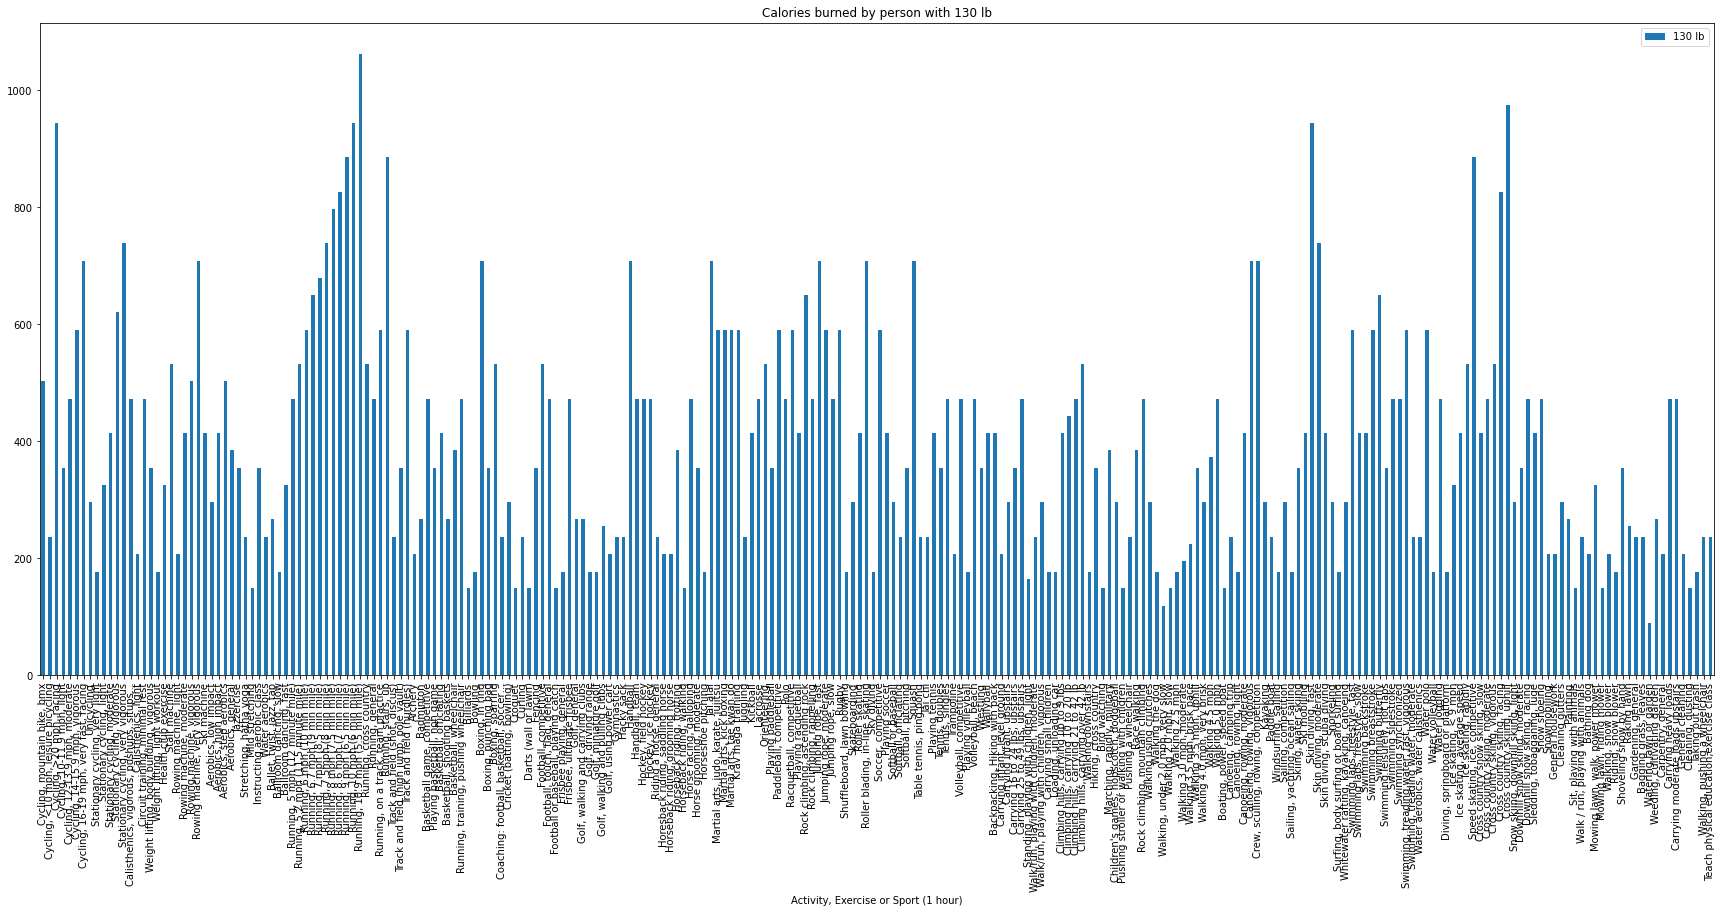

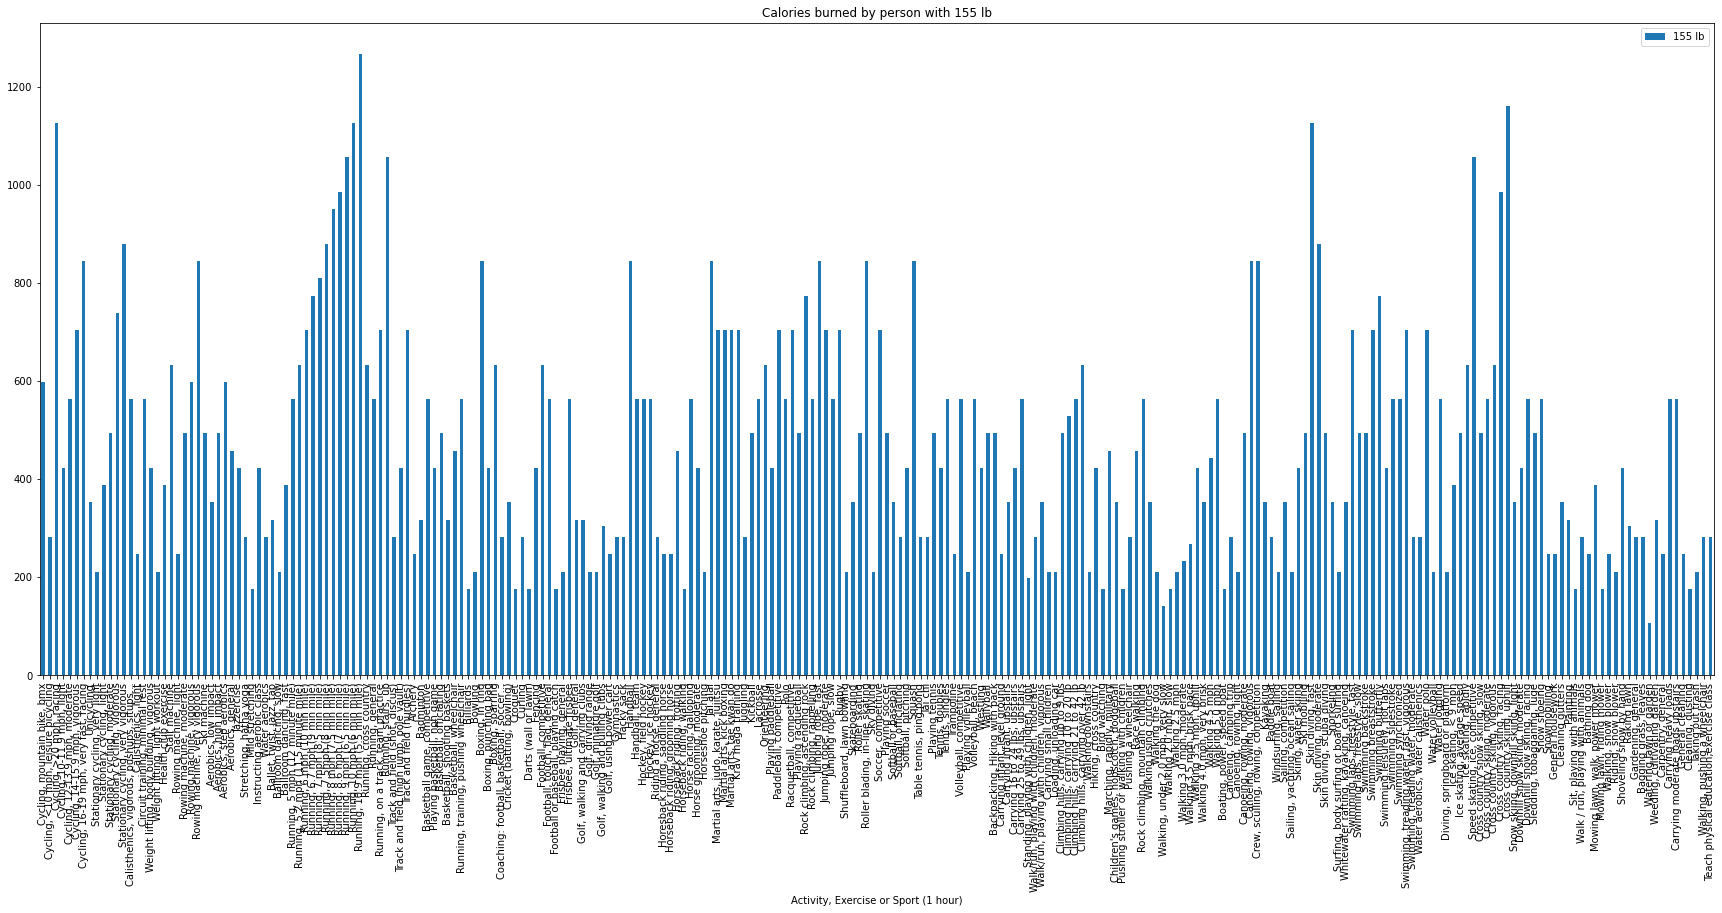

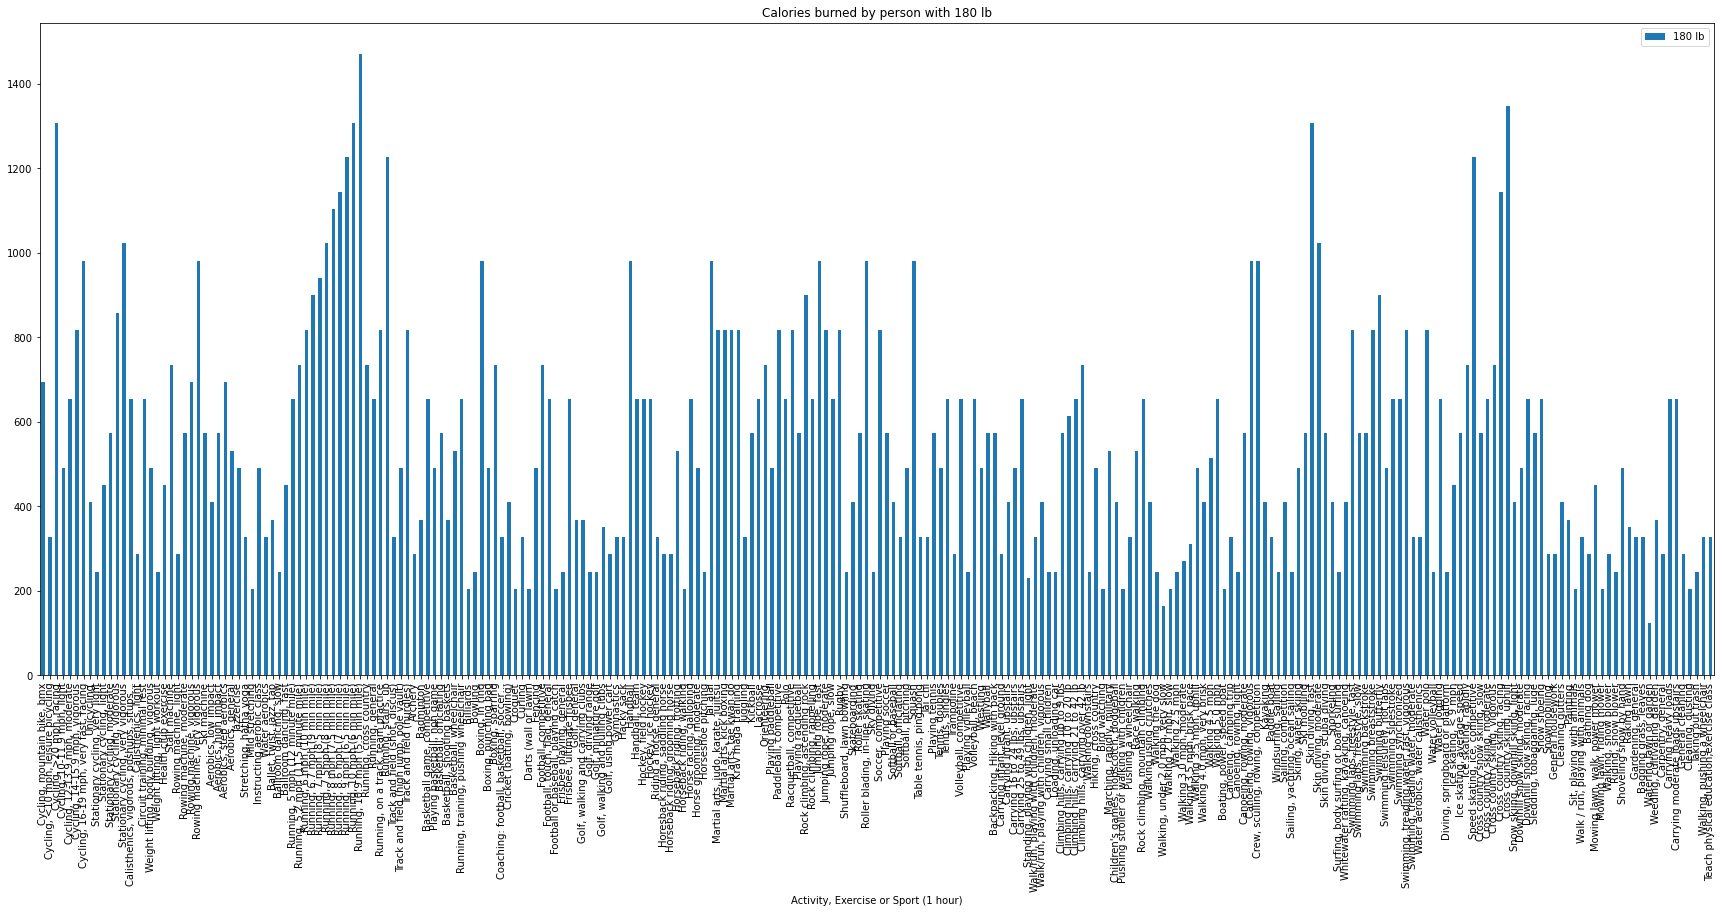

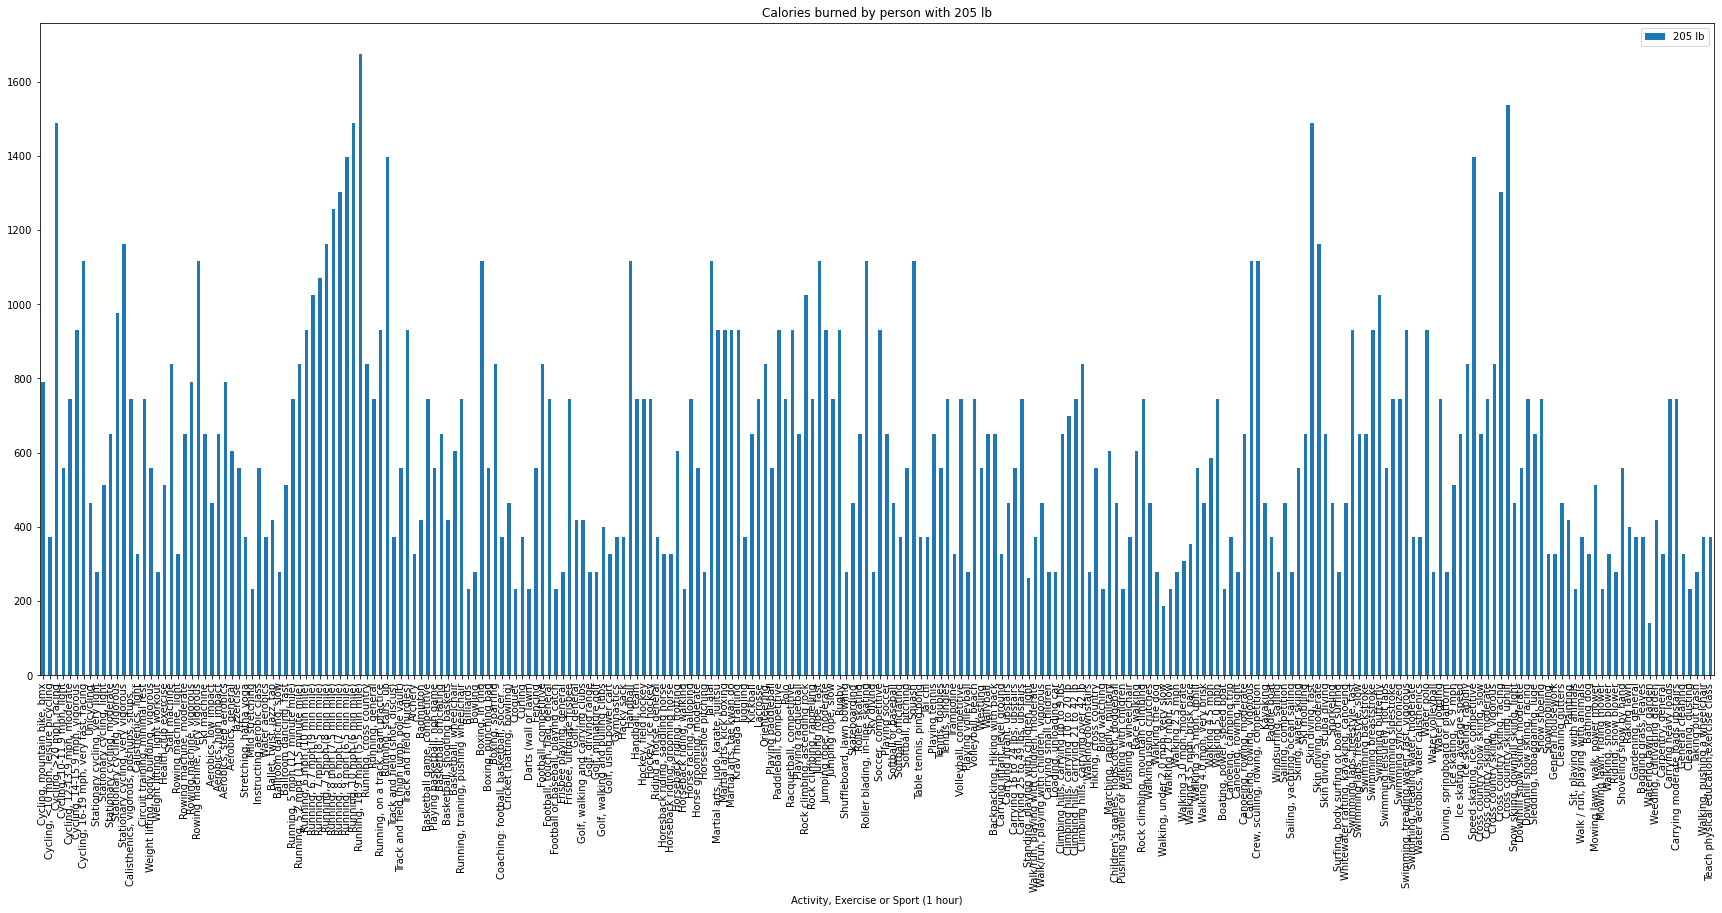

In [10]:
# For each feature, make a plot that shows the variability in its values
 
impdata.plot.bar(x = "Activity, Exercise or Sport (1 hour)", y = '130 lb', title = 'Calories burned by person with 130 lb', figsize=(30,12))
impdata.plot.bar(x = "Activity, Exercise or Sport (1 hour)", y = '155 lb', title = 'Calories burned by person with 155 lb', figsize=(30,12))
impdata.plot.bar(x = "Activity, Exercise or Sport (1 hour)", y = '180 lb', title = 'Calories burned by person with 180 lb', figsize=(30,12))
impdata.plot.bar(x = "Activity, Exercise or Sport (1 hour)", y = '205 lb', title = 'Calories burned by person with 205 lb', figsize=(30,12))

# We can see on the plot's output that each persona has being expoused to all 248 activities:
# Thos activites are divided by categories and intensity:
#E.g: Categoryes are cycling, running, bowling, and etc.
#     Intensity are (light, moderate, vigorous, racing)

## Even thougt the inital plots give us some insights, I believe that it is not a good visualzation, so I will also breakdown this data, to get better visualization

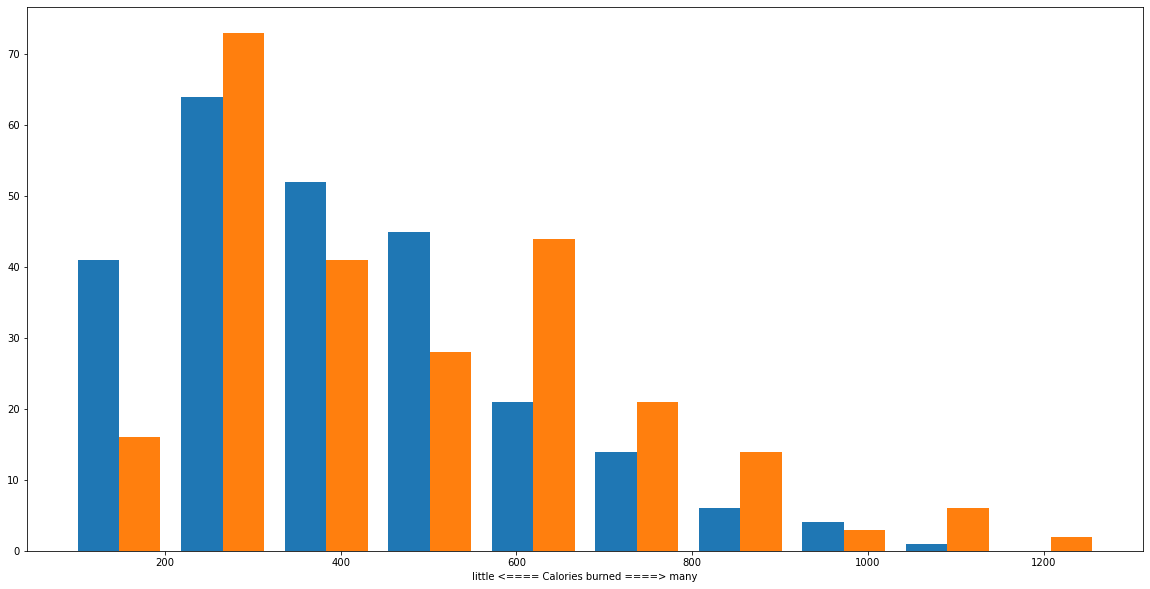

In [39]:
# Here I am defining variables that will help me plot more expecific information, and also be able to compare personas across each other. It wil also give me initial direction to answer my research question.
plt.figure(figsize=(20,10))
a = impdata['130 lb']
b = impdata['155 lb']
c = impdata['180 lb']
d = impdata['205 lb']
act = impdata['Activity, Exercise or Sport (1 hour)']

# I will start comparing a (persona with '130 lb'), and b (persona with 155 lb).
plt.xlabel("little <==== Calories burned ====> many")
plt.hist([a, b]);

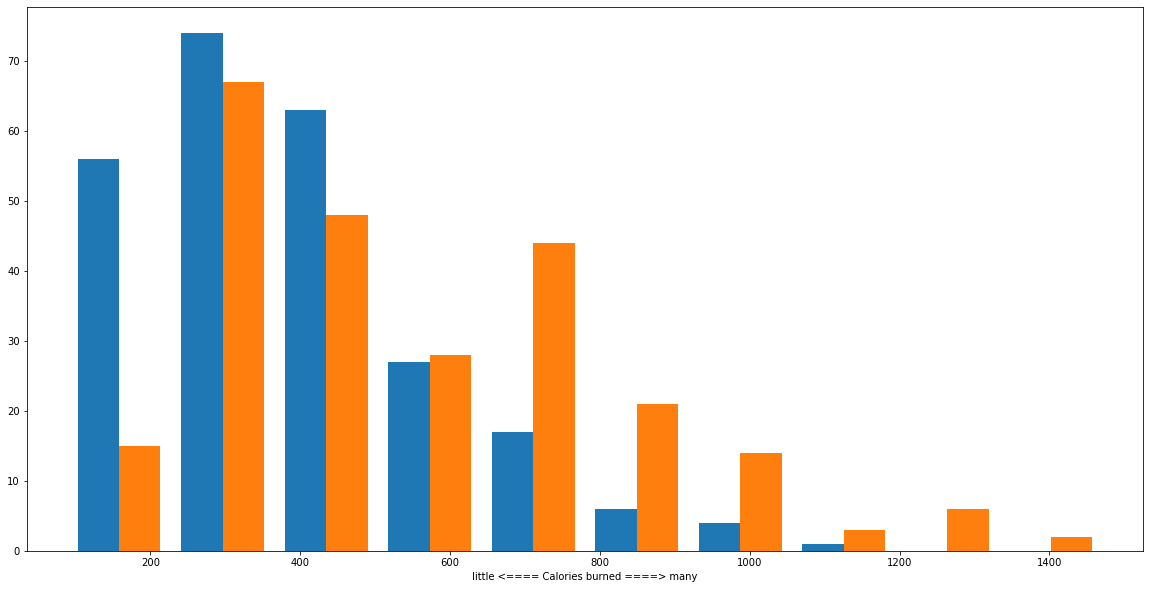

In [38]:
plt.figure(figsize=(20,10))
# Comparing a ( persona with '130 lb'), and c (persona with 180 lb)
plt.xlabel("little <==== Calories burned ====> many")
plt.hist([a,c]);

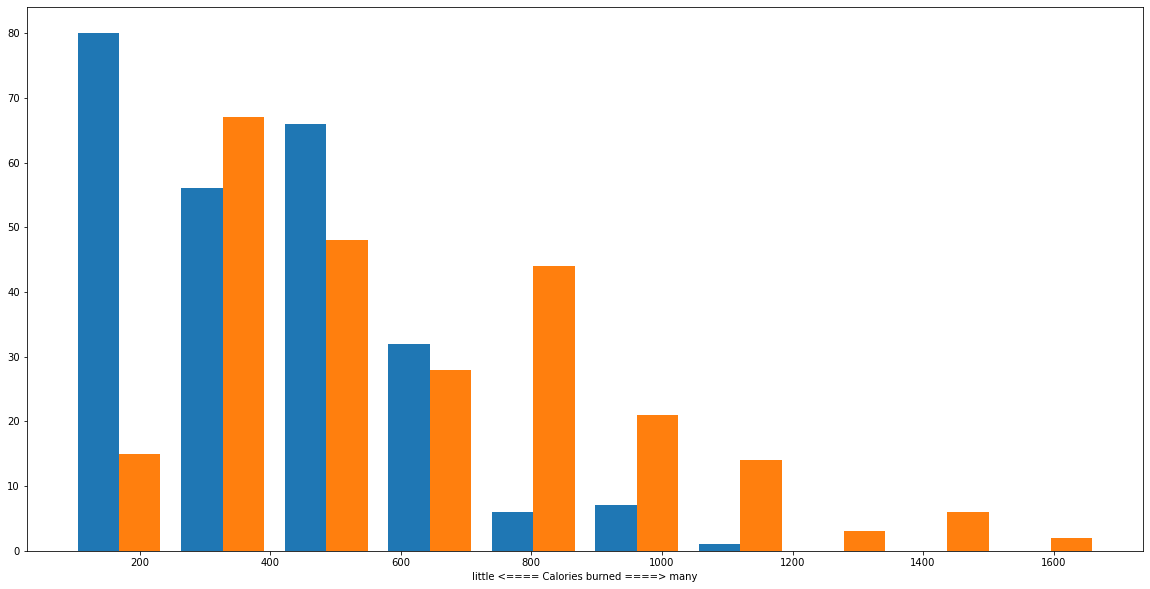

In [37]:
plt.figure(figsize=(20,10))
# Comparing a ( persona with '130 lb'), and c (persona with 205 lb)
plt.xlabel("little <==== Calories burned ====> many")
plt.hist([a,d]);

**Inital observation after plotting two different strategies**

- Based on my plots and exploration, I can start to see that there is a correlation between weight and calories burned comparing different personas.
- However the plots are not good yet, and 9it can be a little confusing.
- with that in mind,  I am going to try a different strategy
    - I am going to select 3 different acivities, create 3 new dataframes, and using a different type of plotting to better visualize the information that I would like to confirm on my research topic.

In [41]:
# Selecting 3 activites that we will b e using to compare
bowling = impdata.loc[impdata['Activity, Exercise or Sport (1 hour)']=='Bowling']
running = impdata.loc[impdata['Activity, Exercise or Sport (1 hour)']=='Running, general'] 
handball = impdata.loc[impdata['Activity, Exercise or Sport (1 hour)']=='Handball']

In [42]:
#Defining Data Frame
df1 = pd.DataFrame(bowling)
df2 = pd.DataFrame(running)
df3 = pd.DataFrame(handball)

In [43]:
#Dropping feature (Columns) that we dont need
df1 = df1.drop(["Calories per kg"], axis=1)
df2 = df2.drop(["Calories per kg"], axis=1)
df3 = df3.drop(["Calories per kg"], axis=1)

In [45]:
# Here I am using a concat strategy to regroup the 3 dataframes that I sub-created. 
# My intension here, was to clean the data, so I can provide a better visuzalization. 
# I am sure there are many ways to d it, but this is how I was able to have a better plot and finallize answer my research topic.
dfs = [df1, df2, df3]
df4 = pd.concat(dfs)
print(df4)

   Activity, Exercise or Sport (1 hour)  130 lb  155 lb  180 lb  205 lb
64                              Bowling     177     211     245     279
49                     Running, general     472     563     654     745
87                             Handball     708     844     981    1117


<AxesSubplot:title={'center':'Calories burned by person'}, ylabel='Activity, Exercise or Sport (1 hour)'>

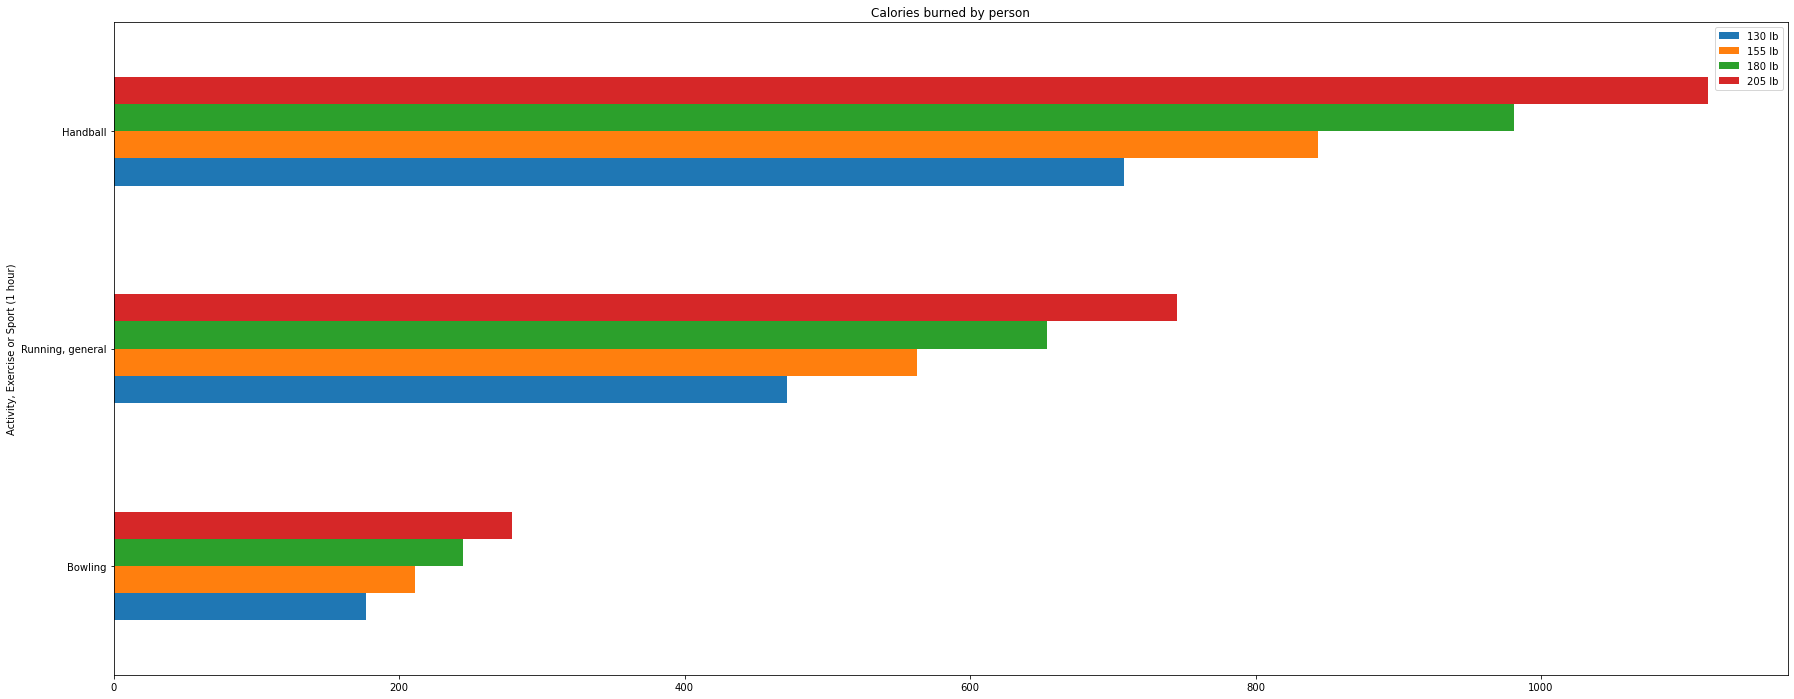

In [46]:
# Plotting 3 different activity, and the 5 different weights (person) that was expoused to the same activity.
# According to the data, we can conclude that a person with 205 lb, burned more calory than a person with 130lb, 
# Even though they were expoused to the same sport exercise, same intensity, and same period.
df4.plot.barh("Activity, Exercise or Sport (1 hour)", title = 'Calories burned by person', figsize=(30,12))


**Results:**

    To talk about the results I will come back to the inital research questions:
    - Is there a correlation between how many calories a person can burn vs their weight, while being expoused to the same intensity, excercity type, conditions, and time.
   **The answer is: YES**
    - As we can see on the last plot, selecting 3 different sport activities, and using the filters to group the 4 different personas, it is clear that there is a difference. A person with higher weight burns more calory than a person with lower weight
    



    As I mentioned, I was inspired to do this research because of my real expereince along with my friends. This questions come up because we were traning for a specific goal, but each person were getting different results.
    Now the new questions would be:
**How can we optimize our traning in order to everyone achive the same or similar results**
    
    With this new question, I will plot different graphs to try to find the answer.
    By analyziing the dataset I was able to see pics of calory in specific activities like cycling. 
    I am curious to know the mean avenare of calories burn per persona.
    Also I noticed that inside of each activity there are different intensity.
    Let's see it in action. =]

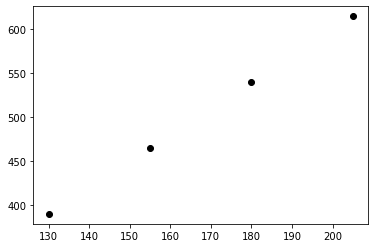

In [51]:
#In order to validate this questions I am going to calculate the avarge of calory burned across all 248 activities inside of each persona group
x = [130, 155, 180, 205]
y = [impdata['130 lb'].mean(), impdata['155 lb'].mean(), impdata['180 lb'].mean(), impdata['205 lb'].mean()]
plt.plot(x,y,'ko')



In [52]:
# Now I am going to filter/break the initial dataset into small df, so I can play with different sport activities.
cyclingdf = impdata.loc[impdata['Activity, Exercise or Sport (1 hour)'].str.contains('Cycling')]
cyclingdf

# Here it is possible to identify that there is different intensity inside cycling.

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
5,"Cycling, 14-15.9 mph, vigorous",590,704,817,931,2.059443
6,"Cycling, 16-19 mph, very fast, racing",708,844,981,1117,2.471061


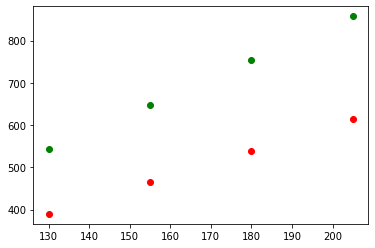

In [55]:
# Here I would like to compare the total activies avarage vs cyling avrage
x = [130, 155, 180, 205]
y1 = [impdata['130 lb'].mean(), impdata['155 lb'].mean(), impdata['180 lb'].mean(), impdata['205 lb'].mean()]
y2 = [cyclingdf['130 lb'].mean(), cyclingdf['155 lb'].mean(), cyclingdf['180 lb'].mean(), cyclingdf['205 lb'].mean()]
plt.plot(x,y1,'ro')
plt.plot(x,y2,'go')

# According to the plot we can see that Cylcing (y2 = in green) is above the avarage of all the avarage of all activities.
# It starts to give us idea of how to optimize the traning. 
# Maybe while perosas (180 LB, and 205 lB) can do lifthing, persosas (130 lb, and 155lb) can do cycling. it will put everyone close to the same calaries burned within an hour. 

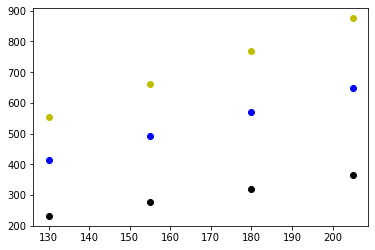

In [57]:
# here I am going to filter/break the dataset into 3 new df (lightdf, moderatedf, vigorousdf) and I will plot the output to validate the information.
lightdf = impdata.loc[impdata['Activity, Exercise or Sport (1 hour)'].str.contains('light')]
moderatedf = impdata.loc[impdata['Activity, Exercise or Sport (1 hour)'].str.contains('moderate')]
vigorousdf = impdata.loc[impdata['Activity, Exercise or Sport (1 hour)'].str.contains('vigorous')]

x = [130, 155, 180, 205]
y3 = [lightdf['130 lb'].mean(), lightdf['155 lb'].mean(), lightdf['180 lb'].mean(), lightdf['205 lb'].mean()]
y4 = [moderatedf['130 lb'].mean(), moderatedf['155 lb'].mean(), moderatedf['180 lb'].mean(), moderatedf['205 lb'].mean()]
y5 = [vigorousdf['130 lb'].mean(), vigorousdf['155 lb'].mean(), vigorousdf['180 lb'].mean(), vigorousdf['205 lb'].mean()]

plt.plot(x,y3,'ko')
plt.plot(x,y4,'bo')
plt.plot(x,y5,'yo')


# That plot give me more confidence that even with the same exercise, the intensity matter, and defently it is possible to optimize everyone's traning.

**Discussion/Conclusion**

    As a conclusion I can tell that this research helped me and my friends to get really good insights of our inital questions, which was:
   **Is there a correlation between how many calories a person can burn vs their weight, while being expoused to the same intensity, excercity type, conditions, and time**

    More than that, we were able to learn that it is also possible to optimize our traning and be very intentional with our program, using data science.
    
    I also understand that there is other factos like diet, health conditions and etc. For this research I took the assunption that everyone was following those external componets corretly.
    
    In additonal, I am very happy to be able to find a good dataset that was well documented and have the information that I need to answer my reseach questions.
    
    During the execution of this project, the bad plots/erros gave me motivation to study more, ask questions, and try differente startegies to be able to show case it. 
    
    
**Thank you professor for challeging us**